# Final Project Submission

* **Student name**: Sara Robinson
* **Student pace**: *self paced*/part time/full time
* **Scheduled project review date/time**: Tuesday 2/9/2021 10:30 AM
* **Instructor name**: Jeff Herman
* **Blog post URL**: https://srobz.github.io/module_2_project
* **Notebook**: *3*/3

## Introduction
This is the third notebook for the Module 2 Final Project. It is picking up at Modeling the data and Model Validation.

## Import Libraries
In the following cells I again import the relevant libraries.

### Import Data Cleaning and Visualization Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import Statistics Libraries

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Data
In the previous notebook, we explored the data and made an updated dataframe ready to be modeled. In the following cell we will load this dataset into the notebook then move on to model it.

In [3]:
df = pd.read_csv('UpdatedEDA.csv') #Creating dataframe for data set
df.head() #Pulling up first 5 rows to inspect

,Unnamed: 0,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,221900.0,3,1.00,0.0,3,7,47.5112,-122.257,0,0,0,0,0,0
1,1,538000.0,3,2.25,0.0,3,7,47.7210,-122.319,1,0,1,0,0,0
2,2,180000.0,2,1.00,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,3,604000.0,4,3.00,0.0,5,7,47.5208,-122.393,1,0,0,0,0,0
4,4,510000.0,3,2.00,0.0,3,8,47.6168,-122.045,0,0,0,0,0,0


Before we go further, I am going to remove the oclumn **Unnamed:0** as it was added when I saved the previous dataframe.

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1) #Dropping unnamed column
df.head() #Checking to see that the column was dropped

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,0.0,3,7,47.5112,-122.257,0,0,0,0,0,0
1,538000.0,3,2.25,0.0,3,7,47.7210,-122.319,1,0,1,0,0,0
2,180000.0,2,1.00,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,4,3.00,0.0,5,7,47.5208,-122.393,1,0,0,0,0,0
4,510000.0,3,2.00,0.0,3,8,47.6168,-122.045,0,0,0,0,0,0


We also need to change the names of the dummy variables in order to remove the "." from the column names.

In [5]:
subs = [('.', '_')] #Replacing . with _
def col_formatting(col): #Defining function
    for old, new in subs: #Creating for loop within function
        col = col.replace(old, new) #Making sure it replaces
    return col #Telling function what to return

df.columns = [col_formatting(col) for col in df.columns] #Updating this to use function

In [6]:
list(df.columns) #Checking to make sure column names were changed

['price',
 'bedrooms',
 'bathrooms',
 'view',
 'condition',
 'grade',
 'lat',
 'long',
 'basement',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5']

# Modeling
First I'll run a train-test split, then I'll make an initial model.

In [7]:
outcome = 'price' #Setting outcome to price
x_cols = list(df.columns) #Setting x_cols to columns in dataframe
x_cols.remove(outcome) #Removing price from x_cols

In [8]:
train, test = train_test_split(df, random_state = 4) #Setting the split

print(len(train), len(test)) #Printing the length of the train and test sets
train.head() #Printing the first 5 rows of train

14744 4915


,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
17848,373000.0,3,2.00,0.0,3,7,47.5926,-122.299,1,0,0,0,0,0
19407,625000.0,4,2.75,2.0,3,9,47.5171,-121.876,1,0,1,0,0,0
17493,500000.0,3,2.25,0.0,3,9,47.7540,-121.942,0,0,1,0,0,0
6212,270000.0,3,1.75,0.0,3,6,47.5517,-122.360,1,0,0,0,0,0
14666,180000.0,3,2.00,0.0,4,7,47.3139,-122.212,0,0,0,0,0,0


In [9]:
test.head() #Printing the first 5 rows of test

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
7077,403500.0,1,1.00,0.0,4,6,47.7340,-122.353,0,0,0,0,0,0
6336,280500.0,4,2.50,0.0,3,8,47.3328,-122.187,0,0,1,0,0,0
3035,247300.0,2,2.00,0.0,3,7,47.5960,-122.311,1,0,1,0,0,0
19131,379500.0,3,2.25,0.0,3,7,47.5344,-122.068,0,0,1,0,0,0
5814,480000.0,2,2.25,0.0,3,8,47.5577,-122.297,0,1,0,0,0,0


In [10]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #setting the formula
model = ols(formula = formula, data = train).fit() #Setting the model
model.summary() #Printing the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:17:12   Log-Likelihood:            -1.9345e+05
No. Observations:               14744   AIC:                         3.869e+05
Df Residuals:                   14730   BIC:                         3.870e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.52e+07   9.85e+05    -25.588      0.000   -2.71e+07   -2.33e+07
bedrooms    1.354e+04   1459.596      9.276      0.000    1.07e+04    1.64e+04
bathrooms   2.747e+04   2362.840     11.626      0.000    2.28e+04    3.21e+04
view        4.658e+04   1700.946     27.383      0.000    4.32e+04    4.99e+04
condition   3.789e+04   1630.738     23.236      0.000    3.47e+04    4.11e+04
grade       9.693e+04   1326.358     73.078      0.000    9.43e+04    9.95e+04
lat         5.629e+05   7304.830     77.055      0.000    5.49e+05    5.77e+05
long        1.708e+04   7762.612      2.201      0.028    1869.013    3.23e+04
basement    2.624e+04   2430.436     10.795      0.000    2.15e+04     3.1e+04
floors_1_5  6.934e+04   3754.400     18.468      0.000     6.2e+04    7.67e+04
floors_2_0  1.762e+04   2981.280      5.911      0.000    1.18e+04    2.35e+04
floors_2_5  6.253e+04    1.5e+04      4.179      0.000    3.32e+04    9.19e+04
floors_3_0 -4.153e+04   6579.382     -6.313      0.000   -5.44e+04   -2.86e+04
floors_3_5  -3.04e+04   4.95e+04     -0.614      0.539   -1.27e+05    6.66e+04
==============================================================================
Omnibus:                     1274.082   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1849.521
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       4.050   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results Interpreted**:
* R-squared is 0.610, Skew is 0.691, and Kurtosis is 4.050. Skew and Kurtosis could be a little smaller but our R-squared is already looking good.

Let's move onto our first model.

## Model 1
For the first model, let's look at p-values and remove those that are insignificant (> 0.05).

In [11]:
summary = model.summary() #Setting model summary
p_table = summary.tables[1] #Setting ptable
p_table = pd.DataFrame(p_table.data) #Putting info from model into table
p_table.columns = p_table.iloc[0] #Locating columns
p_table = p_table.drop(0) #Dropping from table
p_table = p_table.set_index(p_table.columns[0]) #Setting table index
p_table['P>|t|'] = p_table['P>|t|'].astype(float) #Setting P-value column
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index) #Finding p-values less than 0.05
x_cols.remove('Intercept') #Removing column we don't need
print(len(p_table), len(x_cols)) #Printing length of ptable and x columns
print(x_cols) #Printing the columns

14 12
['bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'lat', 'long', 'basement', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0']


Now let's run the model with just these features.

In [12]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:17:35   Log-Likelihood:            -1.9345e+05
No. Observations:               14744   AIC:                         3.869e+05
Df Residuals:                   14731   BIC:                         3.870e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.518e+07   9.84e+05    -25.583      0.000   -2.71e+07   -2.32e+07
bedrooms    1.356e+04   1458.987      9.297      0.000    1.07e+04    1.64e+04
bathrooms   2.739e+04   2359.241     11.610      0.000    2.28e+04     3.2e+04
view        4.657e+04   1700.903     27.382      0.000    4.32e+04    4.99e+04
condition   3.791e+04   1630.476     23.250      0.000    3.47e+04    4.11e+04
grade       9.692e+04   1326.298     73.077      0.000    9.43e+04    9.95e+04
lat         5.628e+05   7303.935     77.055      0.000    5.48e+05    5.77e+05
long        1.723e+04   7759.029      2.220      0.026    2017.554    3.24e+04
basement     2.63e+04   2428.034     10.833      0.000    2.15e+04    3.11e+04
floors_1_5  6.936e+04   3754.041     18.477      0.000     6.2e+04    7.67e+04
floors_2_0  1.772e+04   2977.246      5.951      0.000    1.19e+04    2.36e+04
floors_2_5  6.263e+04    1.5e+04      4.186      0.000    3.33e+04     9.2e+04
floors_3_0 -4.139e+04   6575.214     -6.295      0.000   -5.43e+04   -2.85e+04
==============================================================================
Omnibus:                     1274.772   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1850.830
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       4.050   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results Interpreted**:
* R-squared, skew, and kurtosis stayed the same.
* Multicollinearity is indicated.

Let's move onto our second model.

## Model 2
Since multicollinearity is indicated, I want to look at the variance inflation factor. I am going to remove the features with the highest VIFs and see how that effects the model.

In [13]:
X = df[x_cols] #Setting X to x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #Creating the variance inflation factors
list(zip(x_cols, vif)) #Printing a list of the feature and their VIF score

[('bedrooms', 24.26099956063732),
 ('bathrooms', 24.430858217455),
 ('view', 1.1133508338676021),
 ('condition', 32.35565529126715),
 ('grade', 101.54965705048083),
 ('lat', 112063.42715221587),
 ('long', 111352.702309235),
 ('basement', 2.0089071145949653),
 ('floors_1_5', 1.2094027436816954),
 ('floors_2_0', 3.25410011067198),
 ('floors_2_5', 1.0289738976505227),
 ('floors_3_0', 1.206396921336976)]

It looks like both lat and long have significantly larger VIFs than the rest of the features, so I will remove both of those and run the model. 

In [14]:
vif_scores = list(zip(x_cols, vif)) #Making the vif scores into a list with their feature
x_cols = [x for x, vif in vif_scores if vif < 1000] #removing the features with an overly high vif
print(len(vif_scores), len(x_cols)) #Printing number we have left

12 10


In [15]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:17:54   Log-Likelihood:            -1.9595e+05
No. Observations:               14744   AIC:                         3.919e+05
Df Residuals:                   14733   BIC:                         3.920e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.829e+05   1.24e+04    -47.144      0.000   -6.07e+05   -5.59e+05
bedrooms    6843.2221   1723.511      3.971      0.000    3464.925    1.02e+04
bathrooms   1.376e+04   2751.647      5.001      0.000    8367.285    1.92e+04
view         3.71e+04   2003.928     18.516      0.000    3.32e+04     4.1e+04
condition   3.563e+04   1930.638     18.453      0.000    3.18e+04    3.94e+04
grade       1.113e+05   1552.573     71.678      0.000    1.08e+05    1.14e+05
basement    5.415e+04   2747.514     19.708      0.000    4.88e+04    5.95e+04
floors_1_5  9.236e+04   4411.196     20.937      0.000    8.37e+04    1.01e+05
floors_2_0  1.794e+04   3527.518      5.085      0.000     1.1e+04    2.49e+04
floors_2_5  6.757e+04   1.77e+04      3.813      0.000    3.28e+04    1.02e+05
floors_3_0  2.101e+04   7574.142      2.774      0.006    6165.242    3.59e+04
==============================================================================
Omnibus:                      543.371   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.141
Skew:                           0.477   Prob(JB):                    1.45e-132
Kurtosis:                       3.276   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results Interpreted**:
* The R-squared went down to 0.453, but Skew went down to 0.477 and Kurtosis to 3.276, meaning it is a much more normal distribution than the previous model.
* There is no longer an indication of multicollinearity.
Let's move onto our third model.

## Model 3
In this model I will use the p-value table again but this time removing any features that have a p-value less than 0.01.

In [16]:
summary = model.summary() #Setting model summary
ptable1 = summary.tables[1] #Setting ptable
ptable1 = pd.DataFrame(ptable1.data) #Putting info from model into table
ptable1.columns = ptable1.iloc[0] #Locating columns
ptable1 = ptable1.drop(0) #Dropping from table
ptable1 = ptable1.set_index(ptable1.columns[0]) #Setting table index
ptable1['P>|t|'] = ptable1['P>|t|'].astype(float) #Setting P-value column
x_cols = list(ptable1[ptable1['P>|t|'] < 0.005].index) #Finding p-values less than 0.05
x_cols.remove('Intercept') #Removing column we don't need
print(len(ptable1), len(x_cols)) #Printing length of ptable and x columns
print(x_cols) #Printing the columns

11 9
['bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'basement', 'floors_1_5', 'floors_2_0', 'floors_2_5']


In [17]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1353.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:            -1.9596e+05
No. Observations:               14744   AIC:                         3.919e+05
Df Residuals:                   14734   BIC:                         3.920e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.828e+05   1.24e+04    -47.125      0.000   -6.07e+05   -5.59e+05
bedrooms    6129.4566   1704.585      3.596      0.000    2788.258    9470.656
bathrooms   1.555e+04   2675.319      5.814      0.000    1.03e+04    2.08e+04
view        3.696e+04   2003.696     18.446      0.000     3.3e+04    4.09e+04
condition     3.5e+04   1917.657     18.249      0.000    3.12e+04    3.88e+04
grade       1.117e+05   1545.417     72.283      0.000    1.09e+05    1.15e+05
basement    5.268e+04   2696.915     19.535      0.000    4.74e+04     5.8e+04
floors_1_5  9.154e+04   4402.259     20.793      0.000    8.29e+04       1e+05
floors_2_0  1.476e+04   3337.589      4.423      0.000    8220.548    2.13e+04
floors_2_5  6.453e+04   1.77e+04      3.648      0.000    2.99e+04    9.92e+04
==============================================================================
Omnibus:                      537.354   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.862
Skew:                           0.474   Prob(JB):                    5.51e-131
Kurtosis:                       3.277   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results Interpreted**:
* R-squared stayed the same, and both Skew and Kurtosis decreased slightly.

Let's run this model on the test data now.

# Model Validation

In [18]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = test).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     453.4
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:18:21   Log-Likelihood:                -65384.
No. Observations:                4915   AIC:                         1.308e+05
Df Residuals:                    4905   BIC:                         1.309e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.936e+05   2.16e+04    -27.469      0.000   -6.36e+05   -5.51e+05
bedrooms    3972.3748   2976.244      1.335      0.182   -1862.397    9807.146
bathrooms   1.689e+04   4681.856      3.607      0.000    7710.907    2.61e+04
view         4.27e+04   3258.926     13.103      0.000    3.63e+04    4.91e+04
condition   3.553e+04   3387.653     10.488      0.000    2.89e+04    4.22e+04
grade       1.146e+05   2717.022     42.183      0.000    1.09e+05     1.2e+05
basement    4.064e+04   4870.954      8.344      0.000    3.11e+04    5.02e+04
floors_1_5  1.016e+05   7251.015     14.006      0.000    8.73e+04    1.16e+05
floors_2_0  4998.3111   6057.861      0.825      0.409   -6877.810    1.69e+04
floors_2_5  7.407e+04   2.74e+04      2.703      0.007    2.03e+04    1.28e+05
==============================================================================
Omnibus:                      170.387   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.253
Skew:                           0.456   Prob(JB):                     8.02e-42
Kurtosis:                       3.307   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

They have about the same R-squared, only a thousandths difference between the test and training data. Skew and Kurtosis change slightly as well but overall stay quite close.

In [19]:
train.head()

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
17848,373000.0,3,2.00,0.0,3,7,47.5926,-122.299,1,0,0,0,0,0
19407,625000.0,4,2.75,2.0,3,9,47.5171,-121.876,1,0,1,0,0,0
17493,500000.0,3,2.25,0.0,3,9,47.7540,-121.942,0,0,1,0,0,0
6212,270000.0,3,1.75,0.0,3,6,47.5517,-122.360,1,0,0,0,0,0
14666,180000.0,3,2.00,0.0,4,7,47.3139,-122.212,0,0,0,0,0,0


In [20]:
X_train = train[x_cols] #Setting X-Train
X_test = test[x_cols] #Setting x_test
y_train = train['price'] #Setting y_Train
y_test = test['price'] #Setting y_Test

In [21]:
linreg = LinearRegression() #Setting linreg
DTrain = linreg.fit(X_train, y_train) #fitting

y_hat_train = DTrain.predict(X_train) #Setting y_hat_train
y_hat_test = DTrain.predict(X_test) #Setting y_hat_test

Resid_Train = y_hat_train - y_train #Making the train residual
Resid_Test = y_hat_test - y_test #Making the test residual

train_MSE = mean_squared_error(y_train, y_hat_train) #Calculating mean squared error for training set
test_MSE = mean_squared_error(y_test, y_hat_test) #Calculating mean squared error for testing set
print('Train Mean Squared Error:', train_MSE) #Printing it neatly
print('Test Mean Squared Error:', test_MSE) #Printing it neatly

R_Squared = DTrain.score(X_test, y_test) #Calculating R-squared
print('This iteration has an R-squared value of:', R_Squared)

Train Mean Squared Error: 20494238150.740005
Test Mean Squared Error: 21078283661.192097
This iteration has an R-squared value of: 0.4522055874634848


The R-squared value is similar to that of both the train and test models above. Let's get some visualizations of these models. We'll start with looking at the QQ plot, then we'll take a look at Homoscedasticity.

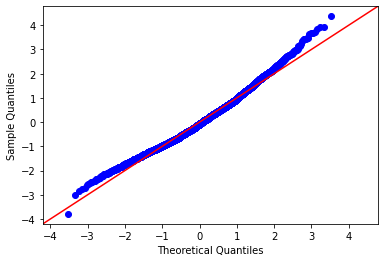

In [22]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True) #Setting QQ Plot

Looking good! Now let's see about that homoscedasticity.

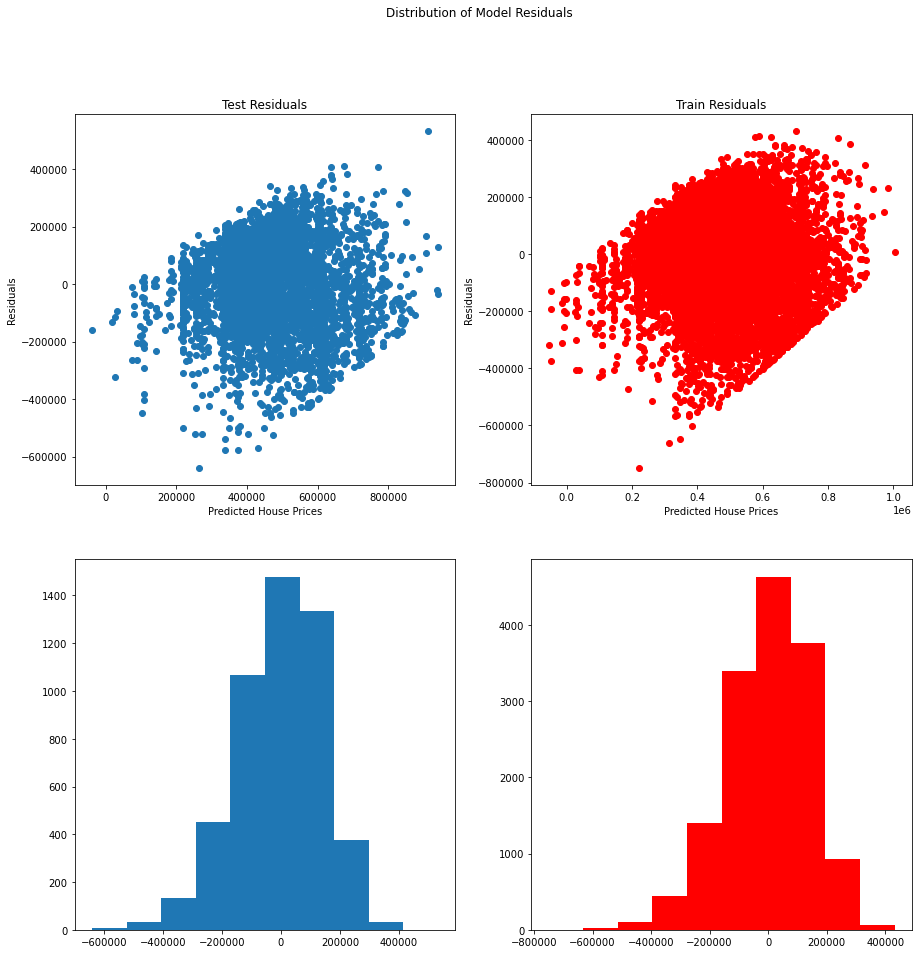

In [23]:
fig = plt.figure(figsize = (15, 15)) #Setting figure size
fig.suptitle('Distribution of Model Residuals') #Setting title of figure

ax1 = fig.add_subplot(2, 2, 1) #Creating scatterplot of test residuals
ax1.scatter(x = y_hat_test, y = Resid_Test) #Setting it to test residuals
ax1.set_title('Test Residuals') #Setting title of plot
ax1.set_xlabel('Predicted House Prices') #Setting X axis label
ax1.set_ylabel('Residuals') #Setting y axis label

ax2 = fig.add_subplot(2, 2, 2) #Creating scatterplot of train residuals
ax2.scatter(x = y_hat_train, y = Resid_Train, c = 'red') #Setting it to train residuals
ax2.set_title('Train Residuals') #Setting title of plot
ax2.set_xlabel('Predicted House Prices') #Setting X axis label
ax2.set_ylabel('Residuals') #Setting y axis label

ax3 = fig.add_subplot(2, 2, 3) #Creating histogram of test residuals
ax3.hist(Resid_Test) #Test residuals

ax4 = fig.add_subplot(2, 2, 4) #Creating histogram of train residuals
ax4.hist(Resid_Train, color = 'red'); #Train residuals

This is our final model!

# Conclusion

1. **Grade**

Grade, which we can think of as a house rating, has the biggest impact on price. When everything else is held constant, you can expect a price increase of about $112,000 per additional point.

2. **Floors**

The number of floors in the home can vastly change the price. When everything else is held constant, houses with 2.5 floors cost about $95,000 more than houses with 2.0 floors.

3. **Bathrooms**

The number of bathrooms the home has can also affect the house price. When everything else is held constant, for each additional bathroom the house has, you can expect a price increase of about $12,000.